# Code setup, run first

In [ ]:
# !pip install -U "mpl-interactions[jupyter] @ git+https://github.com/YoraiLevi/mpl-interactions.git"
# !pip install mpl_interactions[jupyter]

In [ ]:
# from google.colab import output
# output.enable_custom_widget_manager()
%matplotlib ipympl

# Introduction

## Why is optimization important?
AI? Statistics? Modelling?

> Mathematical optimization ... is the selection of a best element, with regard to some criterion, from some set of available alternatives. [Mathematical optimization - wikipedia](https://www.wikiwand.com/en/Mathematical_optimization)

An optimization problem can be formally denoted:
$$
\begin{array}{lcr}
\underset{x \in Ω}{\operatorname{arg min}} f(x)
&
\underset{x \in Ω}{\operatorname{min}} f(x)
\\
\underset{x \in Ω}{\operatorname{arg max}} f(x)
&
\underset{x \in Ω}{\operatorname{max}} f(x)
\end{array}
$$

## This is just a decleration of a problem!
However this syntax does not demonstrate **HOW** to choose the best element and if it's **UNIQUE**.  


# Algorithms and computation

## Analytical methods
We probably know some ways to start solving simple 1 variable problems since highscool with calculus! of course.  
for more complex problems we can check a reference book (just to be sure) and follow chapter 8 of [Numerical Methods and Optimization \ Theory and Practice for Engineers - Jean-Pierre Corriou](https://link.springer.com/book/10.1007/978-3-030-89366-8)

In chapter 8 we can see details for analytical algorithms and gurantees for optimality conditions, in essense "Lagrange Multipliers, Karush–Kuhn–Tucker conditions (KKT)" are generalizations of everything we've learned in highschool and Lagrange multipliers respectively.

* Lagrange Multipliers:  
** Given problem: $\underset{x \in R^n}{\operatorname{min}} f(x) \;
s.t. \; g_i(x)=0, i = 1,...,m$  
$\mathcal{L} = f(x) + \sum_{i=1}^{m}λ_ig_i(x) $  
$G(x) = (g_1,...g_m)$  
**  Necessary Optimality condition:  
$\frac{\partial\mathcal{L}}{\partial x_j}=0 \; j = 1,...,n$  
$\frac{\partial\mathcal{L}}{\partial \lambda_i}=0 \; i = 1,...,m$  
$ rank((D_xG)|_{x^*}) = m $  

* Karush–Kuhn–Tucker conditions:    
**    Given problem: $\underset{x \in R^n}{\operatorname{min}} f(x) \; s.t. \; g_i(x)\le0, i = 1,...,m \;$
**    Necessary Optimality condition:  
$\frac{\partial\mathcal{L}}{\partial x_j}=0 \; j = 1,...,n$  
$g^{active}_i(x^*) = 0 \; i\in[1,m] \; g^{inactive}_i(x^*) < 0 \; i\in[1,m]$  
$λ_i^* \ge 0$  
$ rank((D_xG)|_{x^*}) = m $  


We solve the optimality condition (if even possible) list all the possible points and choose our most desired one.

That's tedious!

## Computer assisted methods
Nowadays we do not need to do a lot of algebra by hand, hopefully. there are many tools that could help like:
* [Wolfram Mathematica](https://www.wolfram.com/mathematica/) - available for Technion students and faculty through a simple license request
* [sagemath](https://www.sagemath.org/) - which is easily available at [cocalc.com](https://cocalc.com) or can be used locally with a [docker image]( https://hub.docker.com/r/sagemath/sagemath).  
    (as of 23/05/2024) It is troublesome to setup locally on your own personal system and isn't available at all in google colab for ease of use. it is a shame.



In [ ]:
from IPython.display import display
# sympy example for simple Lagrange Multipliers https://www.youtube.com/watch?v=wBzkT3SpPxU
# Min/Max of x+2y+3z s.t x-y+z-1 = 0 and x^2+y^2-1 = 0
#                 .::::::::.         .
#                 +:::::::::-     :-==-
#                 =.       .- .:-=-----=:
#                 =.       .==----------=-.
#                 =.       .=-------=-=-=-=-
#                 =.       .=-------------==-
#                 :=.       .=----------=-:.
#             .:-=-=.       :--------=-:
#         :-==----=.    .:------==:.
#     .:-=--------=..::------=-:
#     :==------------------===-
#    ===---------------=-:. ::
#    -==------------=-:     ::
#    .==--------=-:=:.     .:.
#     ==-----=-:      .....
#     :=-==:.
#     .=-.


import sympy as sp
sp.init_printing()

x,y,z = sp.var('x,y,z')
f = x+2*y+3*z
g1 = x-y+z-1
g2 = x**2+y**2 - 1

lam1, lam2 = sp.symbols('lambda_1, lambda_2')
L = f - lam1*g1 - lam2*g2
gradL = [sp.diff(L,var) for var in [x,y,z]]
eqs = gradL + [g1] + [g2]
solutions = sp.solve(eqs,[x,y,z,lam1,lam2],dict=True)
for i,solution in enumerate(solutions):
    print(f"Solution {i}")
    display(solution)
    display(f.subs(solution))

A quote from the Numerical Methods preface:
> it is important to
be aware of the high-quality programs produced by specialists (e.g., GAMS, NAG,
IMSL) and available in numerical libraries; many of them are freely available on
the Internet (e.g., LAPACK, BLAS, EISPACK, LINPACK, ODEPACK, MINPACK)
while also being of excellent quality. For partial differential equations with 2D and
3D applications in heat transfer, fluid mechanics, material resistance, and commercial
software (e.g., Comsol, Fluent) as well as excellent free software (e.g., FreeFEM,
OpenFOAM) is available. In computer-aided design based on finite element analysis,
CATIA, Solidworks, and Ansys are often used for very complex applications. The
already cited software (i.e., GAMS, NAG, IMSL) also contains codes for optimization.
NEOS uses advanced optimization solvers to solve different types of problems.

If that quote was full of new unknown curse words you're probably not alone. This video has a brief history of their importance
https://www.youtube.com/watch?v=6htbyY3rH1w
Is the Future of Linear Algebra.. Random?  
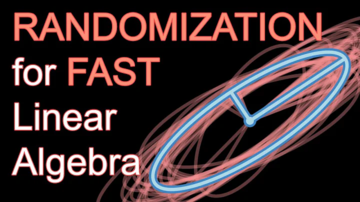

* 0:00 Significance of Numerical Linear Algebra (NLA)
* 1:35 The Paper
* 2:20 What is Linear Algebra?
* 5:57 What is Numerical Linear Algebra?
* 8:53 Some History
* 12:22 A Quick Tour of the Current Software Landscape
* 13:42 NLA Efficiency
* 16:06 Rand NLA's Efficiency
* 18:38 What is NLA doing (generally)?
* 20:11 Rand NLA Performance
* 26:24 What is NLA doing (a little less generally)?
* 31:30 A New Software Pillar
* 32:43 Why is Rand NLA Exceptional?
* 34:01 Follow Up Post and Thank You's

# Numerical methods, optimization

## The **ENGINE** that drives modern optimization & Cobwebbing

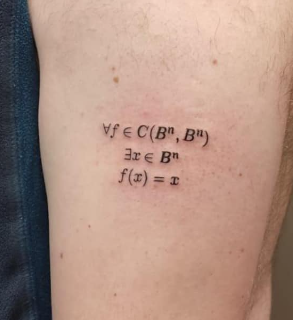


Source: facebook group

### [Banach fixed-point theorem](https://www.wikiwand.com/en/Banach_fixed-point_theorem)

> Let
${\displaystyle (X,d)}$ be a non-empty complete metric space with a contraction mapping
${\displaystyle T:X\to X.}$  
Then T admits a unique fixed-point
${\displaystyle x^{*}}$ in X (i.e.
${\displaystyle T(x^{*})=x^{*}}$).  
 >> ${\displaystyle d(T(x),T(y))<d(x,y)}$ for all
${\displaystyle x\neq y}$ is in general not enough to ensure the existence of a fixed point ... When using the theorem in practice, the most difficult part is typically to define ${\displaystyle T(X)\subseteq X.}$

And most importantly;
> ${\displaystyle x^{*}}$ can be found as follows:  
start with an arbitrary element
${\displaystyle x_{0}\in X}$ and define a sequence
${\displaystyle (x_{n})_{n\in \mathbb {N} }}$  
by ${\displaystyle x_{n}=T(x_{n-1})}$ for
${\displaystyle n\geq 1.}$  
Then ${\displaystyle \lim _{n\to \infty }x_{n}=x^{*}}$.

The wikipedia acticle continues to describe some applications of Banach fixed point theorem, I believe it lacks bravety of its actual importance.

### Code, keep collapsed

In [52]:
# imports

%matplotlib ipympl

from dataclasses import dataclass
from typing import Type, TypedDict, Callable, Tuple
from typing import Concatenate
import numpy as np
import ipywidgets as widgets
from typing import Protocol
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import matplotlib.backend_bases
from matplotlib import pyplot as plt
# import pnumpy as pn
import numpy as np
import time

from typing import Callable, Tuple, Optional
from typing_extensions import Unpack
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import asyncio
from IPython.display import display
import time
from functools import partial
from numba import njit, jit

import asyncio
from time import time
from threading import Timer
import matplotlib as mpl
import ipyspin


In [53]:
# AlgorithmViewer

class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

@dataclass(unsafe_hash=True)
class AlgorithmViewer(ABC):
    # widget_callback: WidgetCallback
    extra_widgets_template: dict[str, Tuple[Type[widgets.Widget], dict]] = None
    ax: plt.Axes = None
    update_widgets_and_plot: Callable = (
        lambda X, Y, marker_pos, *args, **kwargs: np.zeros(1, 1)
    )
    xmin: float = -1
    xmax: float = 1
    ymin: float = -1
    ymax: float = 1
    xmarker: float = 0
    ymarker: float = 0
    resolution: int = 250
    freeze_frame: bool = False
    exception_mode: str = "silent"

    def __post_init__(self, *args, **kwargs):
        with plt.ioff():
            if isinstance(self.ax, plt.Axes):
                self.figure = self.ax.figure
            else:
                self.figure, self.ax = plt.subplots()
            self.figure.set_size_inches(5, 5)
            self.figure.set(dpi=75)
            self._scatter_marker = self.ax.scatter(x=[self.xmarker], y=[self.ymarker])
            self.ax.minorticks_on()
            self.ax.grid(which="minor", alpha=0.5)
            self.ax.grid(which="major", alpha=0.5)

        self.freeze_frame_widget = widgets.ToggleButton(
            description="Freeze frame", value=self.freeze_frame
        )
        # self.limit_change_redraw_widget = widgets.ToggleButton(description='Redraw on limit changes', value=self.limit_change_redraw)
        # widgets for xaxis
        self.xmin_widget = widgets.FloatText(description="xmin:", value=self.xmin)
        self.xmax_widget = widgets.FloatText(description="xmax:", value=self.xmax)

        # widget for yaxis

        self.ymin_widget = widgets.FloatText(description="ymin:", value=self.ymin)
        self.ymax_widget = widgets.FloatText(description="ymax:", value=self.ymax)

        # widget for resolution
        self.resolution_widget = widgets.IntSlider(
            description="res:", min=100, max=1000, value=self.resolution
        )
        # widget for marker
        self.xmarker_widget = widgets.FloatText(
            description="marker X:", value=self.xmarker
        )
        self.ymarker_widget = widgets.FloatText(
            description="marker Y:", value=self.ymarker
        )

        # canvas updates subscription
        self._prev_event = ""
        self._draw_event_cid = self.figure.canvas.mpl_connect(
            "draw_event", self._draw_event_callback
        )
        self._button_press_event_cid = self.figure.canvas.mpl_connect(
            "button_press_event", self._button_pressed_event_callback
        )
        self._button_release_event_cid = self.figure.canvas.mpl_connect(
            "button_release_event", self._button_released_event_callback
        )
        self.figure.canvas.capture_scroll = True
        self._zoom_cid = self.figure.canvas.mpl_connect(
            "scroll_event", self._scroll_callback
        )
        # canvas axis subscription

        def debounce(wait):
            """Decorator that will postpone a function's
            execution until after `wait` seconds
            have elapsed since the last time it was invoked."""

            def decorator(fn):
                timer = None

                def debounced(*args, **kwargs):
                    nonlocal timer

                    def call_it():
                        fn(*args, **kwargs)

                    if timer is not None:
                        timer.cancel()
                    timer = Timer(wait, call_it)
                    timer.start()

                return debounced

            return decorator

        def throttle(wait):
            """Decorator that prevents a function from being called
            more than once every wait period."""

            def decorator(fn):
                time_of_last_call = 0
                scheduled, timer = False, None
                new_args, new_kwargs = None, None

                def throttled(*args, **kwargs):
                    nonlocal new_args, new_kwargs, time_of_last_call, scheduled, timer

                    def call_it():
                        nonlocal new_args, new_kwargs, time_of_last_call, scheduled, timer
                        time_of_last_call = time()
                        fn(*new_args, **new_kwargs)
                        scheduled = False

                    time_since_last_call = time() - time_of_last_call
                    new_args, new_kwargs = args, kwargs
                    if not scheduled:
                        scheduled = True
                        new_wait = max(0, wait - time_since_last_call)
                        timer = Timer(new_wait, call_it)
                        timer.start()

                return throttled

            return decorator

        self._update_plot = throttle(0.1)(debounce(0.5)(self._update_plot))
        self.spinner_widget = ipyspin.Spinner()

        def x_changed(change):
            try:
                pass
                xmin, xmax = self.ax.get_xlim()
                if xmin is not None:
                    self.xmin_widget.value = xmin
                if xmax is not None:
                    self.xmax_widget.value = xmax
                # self._update_plot()
            except Exception as e:
                raise e
                pass

        def y_changed(change):
            try:
                pass
                ymin, ymax = self.ax.get_ylim()
                if ymin is not None:
                    self.ymin_widget.value = ymin
                if ymax is not None:
                    self.ymax_widget.value = ymax
                # self._update_plot()
            except Exception as e:
                raise e
                pass

        self.ax.callbacks.connect("xlim_changed", x_changed)
        self.ax.callbacks.connect("ylim_changed", y_changed)

        # widgets from extra_widgets_template
        if self.extra_widgets_template:
            self.extra_widgets: dict[str, widget.Widget] = {
                key: widg(**_kwargs)
                for key, (widg, _kwargs) in self.extra_widgets_template.items()
            }
            for key, widget in self.extra_widgets.items():
                widget.observe(self._update_plot, names="value")
        else:
            self.extra_widgets = {}

        def xmin_changed(change):
            self.ax.set_xlim((change.new, self.xmax_widget.value))
            # if self.is_update_limit_changed:
            self._update_plot()

        def xmax_changed(change):
            self.ax.set_xlim((self.xmin_widget.value, change.new))
            # if self.is_update_limit_changed:
            self._update_plot()

        def ymin_changed(change):
            self.ax.set_ylim((change.new, self.ymax_widget.value))
            # if self.is_update_limit_changed:
            self._update_plot()

        def ymax_changed(change):
            self.ax.set_ylim((self.ymin_widget.value, change.new))
            # if self.is_update_limit_changed:
            self._update_plot()

        self.xmin_widget.observe(xmin_changed, names="value")
        self.xmax_widget.observe(xmax_changed, names="value")
        self.ymin_widget.observe(ymin_changed, names="value")
        self.ymax_widget.observe(ymax_changed, names="value")
        # self.limit_change_redraw_widget.observe(self._update_plot, names='value')
        self.freeze_frame_widget.observe(self._update_plot, names="value")
        self.resolution_widget.observe(self._update_plot, names="value")
        self.xmarker_widget.observe(self._update_marker, names="value")
        self.ymarker_widget.observe(self._update_marker, names="value")

    def close(self):
        plt.close(self.figure)

    @property
    def is_freeze_frame(self):
        return self.freeze_frame_widget.value

    def update_interactive(self, state=True):
        self.freeze_frame_widget.value = state

    def set_marker_visible(self, state=True):
        self._scatter_marker.set_visible(state)

    @abstractmethod
    def _update_widgets_and_plot(self, X, Y, marker_pos, *args, **kwargs):
        raise NotImplementedError()

    @property
    def builtin_widgets(self):
        builtin_widgets = {
            key: val
            for key, val in self.__dict__.items()
            if isinstance(val, widgets.Widget)
        }
        return builtin_widgets

    def _update_marker(self, *args, **kwargs):
        marker_pos = [self.xmarker_widget.value, self.ymarker_widget.value]
        self._scatter_marker.set_offsets(marker_pos)
        self.figure.canvas.draw_idle()
        self._update_plot()

    @np.errstate(all="ignore")
    def _update_plot(self, *args, **kwargs):
        if self.is_freeze_frame:
            return
        try:
            builtin_widgets_values = {
                key: widget.value
                for key, widget in self.builtin_widgets.items()
                if hasattr(widget, "value")
            }
            extra_widgets_values = {
                key: widget.value
                for key, widget in self.extra_widgets.items()
                if hasattr(widget, "value")
            }

            xmax, xmin = self.xmax_widget.value, self.xmin_widget.value
            ymax, ymin = self.ymax_widget.value, self.ymin_widget.value
            resolution = self.resolution_widget.value
            marker_pos = [self.xmarker_widget.value, self.ymarker_widget.value]

            self.spinner_widget.spin()
            self._update_widgets_and_plot(
                marker_pos=marker_pos,
                xmax=xmax,
                xmin=xmin,
                ymax=ymax,
                ymin=ymin,
                resolution=resolution,
                builtin_widgets=self.builtin_widgets,
                extra_widgets=self.extra_widgets,
                **builtin_widgets_values,
                **extra_widgets_values
            )
            self.spinner_widget.stop()
            self.figure.canvas.draw_idle()
        except Exception as e:
            if self.exception_mode == "raise":
                raise e
            elif self.exception_mode == "log":
                print(e)
            else:
                pass
        finally:
            pass

    def _cancel_action(self):
        self._xypress = []
        if self._id_drag:
            self.figure.canvas.mpl_disconnect(self._id_drag)
            self._id_drag = None

    def _mouse_move(self, event):
        for a, _ind in self._xypress:
            # safer to use the recorded button at the _press than current
            # button: # multiple button can get pressed during motion...
            a.drag_pan(1, event.key, event.x, event.y)
        self.figure.canvas.draw_idle()

    def _scroll_callback(self, event: matplotlib.backend_bases.MouseEvent):
        base_scale = 1.1
        has_toolbar = (
            hasattr(self.figure.canvas, "toolbar")
            and self.figure.canvas.toolbar is not None
        )
        toolbar = self.figure.canvas.toolbar
        if has_toolbar:
            toolbar.push_current()
        if event.inaxes is not self.ax:
            return
        # get the current x and y limits
        cur_xlim = self.ax.get_xlim()
        cur_ylim = self.ax.get_ylim()
        # set the range
        xdata = event.xdata  # get event x location
        ydata = event.ydata  # get event y location
        if event.button == "up":
            # deal with zoom in
            scale_factor = base_scale
        elif event.button == "down":
            # deal with zoom out
            scale_factor = 1 / base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
        # set new limits
        new_xlim = [
            xdata - (xdata - cur_xlim[0]) / scale_factor,
            xdata + (cur_xlim[1] - xdata) / scale_factor,
        ]
        new_ylim = [
            ydata - (ydata - cur_ylim[0]) / scale_factor,
            ydata + (cur_ylim[1] - ydata) / scale_factor,
        ]

        self.ax.set_xlim(new_xlim)
        self.ax.set_ylim(new_ylim)
        self._update_plot()
        self.figure.canvas.draw_idle()
        self.prev_event = event.name

    def _draw_event_callback(self, event):
        self.prev_event = event.name

    def _button_pressed_event_callback(self, event):
        self.prev_event = event.name
        if event.button != 3:  # self.button:
            self._cancel_action()
            return
        x, y = event.x, event.y

        self._xypress = []
        for i, a in enumerate(self.figure.get_axes()):
            if (
                x is not None
                and y is not None
                and a.in_axes(event)
                and a.get_navigate()
                and a.can_pan()
            ):
                a.start_pan(x, y, event.button)
                self._xypress.append((a, i))
                self._id_drag = self.figure.canvas.mpl_connect(
                    "motion_notify_event", self._mouse_move
                )

    def _button_released_event_callback(self, event):
        if self.prev_event == "button_press_event":
            x, y = event.xdata, event.ydata
            if x is not None and y is not None:
                self.xmarker_widget.value = x
                self.ymarker_widget.value = y
        self.prev_event = event.name

        self._cancel_action()
        self.figure.canvas.mpl_disconnect(self._id_drag)

        for a, _ind in self._xypress:
            a.end_pan()
        if not self._xypress:
            self._cancel_action()
            return
        self._cancel_action()

    def widgetsBoxes(self, with_axis_widgets=True):
        axis_widgets = []
        if with_axis_widgets:
            axis_widgets = [
                self.resolution_widget,
                self.xmin_widget,
                self.xmax_widget,
                self.ymin_widget,
                self.ymax_widget,
                self.xmarker_widget,
                self.ymarker_widget,
                self.freeze_frame_widget,
                self.spinner_widget,
            ]
        algorithm_widgets = list(self.extra_widgets.values())
        axis, algo = widgets.VBox(axis_widgets), widgets.VBox(algorithm_widgets)
        return widgets.VBox([algo, axis]), axis_widgets, algorithm_widgets

    def show(self, widgets_position="left", show_figure=True):
        # left / right / below
        children = []
        if show_figure:
            children = children + [self.figure.canvas]
        children = children + [self.widgetsBoxes()[0]]
        box = None
        if widgets_position == "left":
            box = widgets.HBox(children[::-1])
        elif widgets_position == "right":
            box = widgets.HBox(children)
        elif widgets_position == "below":
            box = widgets.VBox(children)
        self._update_plot()
        return box

In [54]:
# side by side viewer


@dataclass(unsafe_hash=True)
class MultiAlgorithmViewer:
    algorithms_templates: dict
    link_axis: bool = False
    link_marker: bool = True
    link_resolution: bool = False

    def __post_init__(self, *args, **kwargs):

        self.algorithm_viewer_instances = hashabledict()

        self.reset_button = widgets.Button(
            value=False,
            description="Reset to Default",
            tooltip="Reset the plot to the default settings",
        )
        self.reset_button.on_click(lambda btn: self.reset_algorithem_viewer())

        self.link_resolution_button = widgets.ToggleButton(
            value=self.link_resolution,
            description="Link grid res",
            tooltip="Equal granularity",
        )
        self.link_resolution_button.observe(
            lambda change: self.set_link_resolution(change.new), names="value"
        )
        self.link_pan_zoom_button = widgets.ToggleButton(
            value=self.link_axis,
            description="Link Axis Limits",
            tooltip="Pan and Zoom together",
        )

        self.link_pan_zoom_button.observe(
            lambda change: self.set_link_axis(change.new), names="value"
        )

        self.link_marker_button = widgets.ToggleButton(
            value=self.link_marker,
            description="Link Marker",
            tooltip="The plot markers move together",
        )

        self.link_marker_button.observe(
            lambda change: self.set_link_marker(change.new), names="value"
        )

        def create_algorithm_viewer_dropdown_and_container(idx):

            dropdown = widgets.Dropdown(
                options=self.algorithm_template_options,
                description=f"View {idx+1}:",
                value=self.algorithm_template_options[idx % 2],
            )

            dropdown.observe(lambda change: self.set_algorithm(idx), names="value")

            container = widgets.Box()

            return dropdown, container

        self.viewer_dropdowns_containers = list(
            map(create_algorithm_viewer_dropdown_and_container, range(2))
        )

        self.linked_widgets = {}

    def set_link_resolution(self, state):

        keys = ["resolution_widget"]
        self.set_link_widget_keys(keys, state)

    def set_link_axis(self, state):

        keys = ["xmin_widget", "xmax_widget", "ymin_widget", "ymax_widget"]

        self.set_link_widget_keys(keys, state)

    def set_link_marker(self, state):

        keys = ["xmarker_widget", "ymarker_widget"]

        self.set_link_widget_keys(keys, state)

    def set_link_widget_keys(self, keys, state):

        for key in keys:

            self.set_link_widget_key(key, state)

    def set_link_widget_key(self, key, state):

        if state:

            self.link_widgets_key(key)
        else:
            self.unlink_widgets_key(key)

    def unlink_widgets_key(self, key):

        if key in self.linked_widgets:
            link = self.linked_widgets[key]
            del self.linked_widgets[key]
            link.unlink()

    def unlink_all_widgets(self):

        for key in list(self.linked_widgets.keys()):

            self.unlink_widgets_key(key)

    def link_widgets_key(self, key):

        if key in self.linked_widgets:
            self.unlink_widgets_key(key)
        widgets_to_link = self.builtin_widgets.get(key)
        if widgets_to_link is not None and len(widgets_to_link) > 1:
            widgets_to_link = [(widget, "value") for widget in widgets_to_link]
            self.linked_widgets[key] = widgets.link(*widgets_to_link[:2])

    @property
    def builtin_widgets(self):

        try:

            algos = [
                self.algorithm_viewer_instances[dropdown.value]
                for dropdown, container in self.viewer_dropdowns_containers
            ]

            builtin_widgets = widgets_builtins = {
                key: [
                    builtin_widgets.get(key)
                    for builtin_widgets in [algo.builtin_widgets for algo in algos]
                ]
                for key in set().union(*[algo.builtin_widgets for algo in algos])
            }
        except Exception as e:

            return {}
        return builtin_widgets

    def set_algorithm(self, viewer_idx, force_new=False):
        self.unlink_all_widgets()

        drop_down, container = self.viewer_dropdowns_containers[viewer_idx]

        template_string = drop_down.value

        container.children = [
            self.get_algorithm_viewer(template_string, force_new=force_new).show(
                widgets_position="below"
            )
        ]

        self.set_link_resolution(self.link_resolution_button.value)

        self.set_link_axis(self.link_pan_zoom_button.value)

        self.set_link_marker(self.link_marker_button.value)

    @property
    def algorithm_template_options(self):

        if self.algorithms_templates:

            return list(self.algorithms_templates.keys())

    def get_algorithm_viewer(self, template_string, force_new=False):

        algo_viewer = self.algorithm_viewer_instances.get(template_string)

        if force_new and algo_viewer is not None:

            algo_viewer.close()

            del algo_viewer

            algo_viewer = None
        if not algo_viewer:

            viewer_class, kwargs = self.algorithms_templates[template_string]

            algo_viewer = viewer_class(**kwargs)

            self.algorithm_viewer_instances[template_string] = algo_viewer
        return algo_viewer

    def reset_algorithem_viewer(self):

        for idx, dropdown_container in enumerate(self.viewer_dropdowns_containers):

            self.set_algorithm(idx, force_new=True)

    def show(self):

        self.reset_algorithem_viewer()

        container = widgets.HBox(
            [
                widgets.VBox(self.viewer_dropdowns_containers[0]),
                widgets.VBox(
                    [
                        self.reset_button,
                        self.link_resolution_button,
                        self.link_pan_zoom_button,
                        self.link_marker_button,
                        # self.save_images_button,
                    ]
                ),
                widgets.VBox(self.viewer_dropdowns_containers[1]),
            ]
        )
        return container

In [55]:
# imshowAlgorithmViewer


@dataclass(unsafe_hash=True)
class imshowAlgorithmViewer(AlgorithmViewer):
    imshow = None
    cmin: float = 0
    cmax: float = 1
    color_autoscale: bool = True
    colormap: str = "viridis"

    def __post_init__(self, *args, **kwargs):
        super().__post_init__(*args, **kwargs)
        self.imshow = self.ax.imshow(
            np.zeros((2, 2)),
            origin="lower",
            aspect="equal",
            extent=(self.xmin, self.xmax, self.ymin, self.ymax),
        )
        self.clim_min_widget = widgets.FloatText(
            description="cmap_min:", value=self.cmin
        )
        self.clim_max_widget = widgets.FloatText(
            description="cmap_max:", value=self.cmax
        )
        self.auto_scale_widget = widgets.ToggleButton(
            description="Color autoscale:", value=self.color_autoscale
        )
        self.colormap_widget = widgets.Dropdown(
            options=plt.colormaps(), value=self.colormap, description="Colormap:"
        )
        self.colormap_n_colors_widget = widgets.IntText(
            value=0, min=-1, description="n_colors:"
        )

        self.auto_scale_widget.observe(self._update_autoscale, names="value")

        self.clim_min_widget.observe(self._update_clim, names="value")
        self.clim_max_widget.observe(self._update_clim, names="value")
        self.colormap_widget.observe(self._update_colormap, names="value")
        self.colormap_n_colors_widget.observe(self._update_colormap, names="value")

    def set_imshow_visible(self, state=True):
        return self.imshow.set_visible(state)

    @property
    def autoscale(self):
        return self.auto_scale_widget.value

    def _update_autoscale(self, *args, **kwargs):
        if self.autoscale and self.imshow is not None:
            vmin, vmax = None, None
            self.imshow.set_clim(vmin=vmin, vmax=vmax)
            self.imshow.autoscale()
        else:
            self._update_clim()
        self.figure.canvas.draw_idle()

    def _update_clim(self, *args, **kwargs):
        if self.imshow:
            vmin = self.clim_min_widget.value
            vmax = self.clim_max_widget.value
            if self.autoscale:
                vmin, vmax = None, None
            self.imshow.set_clim(vmin=vmin, vmax=vmax)
            self.auto_scale_widget.value = False
            self.figure.canvas.draw_idle()

    def _update_colormap(self, *args, **kwargs):
        if self.imshow:
            color_map = plt.get_cmap(self.colormap_widget.value)
            vmin, vmax = self.imshow.get_clim()
            n_colors = self.colormap_n_colors_widget.value
            norm = None
            if n_colors < 2:
                norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
            else:
                bounds = np.linspace(vmin, vmax, n_colors)
                norm = mpl.colors.BoundaryNorm(
                    boundaries=bounds, ncolors=256, extend="both"
                )

            # pcm = ax[3].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
            self.imshow.set_norm(norm)
            self.imshow.set_cmap(color_map)
            self.figure.canvas.draw_idle()

    def _update_widgets_and_plot(
        self, xmax, xmin, ymax, ymin, resolution, *args, **kwargs
    ):
        X, Y = np.meshgrid(
            np.linspace(xmin, xmax, resolution),
            np.linspace(ymin, ymax, resolution),
            sparse=True,
        )
        data = self.update_widgets_and_plot(X=X, Y=Y, *args, **kwargs)
        if self.imshow and data is not None:
            self.imshow.set_data(data)
            if self.autoscale:
                self.imshow.autoscale()
            self.imshow.set_extent((X.min(), X.max(), Y.min(), Y.max()))

    def widgetsBoxes(self, *args, **kwargs):  # -> tuple[Any, Any, Any]:
        axis_algo, axis_widgets, algorithm_widgets = super().widgetsBoxes(
            *args, **kwargs
        )
        more_axis_widgets = [
            self.clim_min_widget,
            self.clim_max_widget,
            self.colormap_n_colors_widget,
            self.colormap_widget,
            self.auto_scale_widget,
        ]
        axis_widgets = more_axis_widgets + axis_widgets
        axis, algo = widgets.VBox(axis_widgets), widgets.VBox(algorithm_widgets)
        return widgets.VBox([algo, axis]), axis_widgets, algorithm_widgets

    def show(self, *, colorbar=True, **kwargs):
        box = super().show(**kwargs)
        if colorbar and self.imshow.colorbar is None:
            self.figure.colorbar(self.imshow)
        self._update_autoscale()
        self._update_colormap()
        return box

In [56]:
# plotAlgorithmViewer
@dataclass(unsafe_hash=True)
class plotAlgorithmViewer(AlgorithmViewer):
    lines = None
    set_limits: bool = True

    def __post_init__(self, *args, **kwargs):
        super().__post_init__(*args, **kwargs)
        self.ax.set_xlim([self.xmin, self.xmax])
        self.ax.set_ylim([self.ymin, self.ymax])
        self.lines = self.ax.plot(
            [self.xmin, self.xmax], [self.ymin, self.ymax]
        )  # imshow(np.zeros((2,2)),origin='lower', aspect='equal', extent=(-1,1,-1,1))
        self.relim_widget = widgets.ToggleButton(
            description="auto relim", value=self.set_limits
        )
        self.relim_widget.observe(self._update_relim, names="value")
        self.ax.set_autoscale_on(self.auto_relim)  # xy lim scaling

    def set_lines_visible(self, state=True):
        for line in self.lines:
            line.set_visible(state)

    def _update_relim(self, *args, **kwargs):
        if self.auto_relim:
            self.ax.relim()
            self.ax.set_autoscale_on(self.auto_relim)  # xy lim scaling
            self.ax.autoscale_view(scalex=False, scaley=True)
            self.figure.canvas.draw_idle()

    @property
    def auto_relim(self):
        return self.relim_widget.value

    def _update_widgets_and_plot(
        self, xmax, xmin, ymax, ymin, resolution, *args, **kwargs
    ):
        X, Y = np.meshgrid(
            np.linspace(xmin, xmax, resolution),
            np.linspace(ymin, ymax, resolution),
            sparse=True,
        )
        self.ax.set_xlim([xmin, xmax])
        data = self.update_widgets_and_plot(X, Y, *args, **kwargs)
        if self.lines and len(self.lines) > 0 and self.lines[0] and data is not None:
            self.lines[0].set_data(X, data)
        if self.auto_relim:
            self._update_relim()

    def widgetsBoxes(self, *args, **kwargs):  # -> tuple[Any, Any, Any]:
        axis_algo, axis_widgets, algorithm_widgets = super().widgetsBoxes(
            *args, **kwargs
        )
        more_axis_widgets = [self.relim_widget]
        axis_widgets = more_axis_widgets + axis_widgets
        axis, algo = widgets.VBox(axis_widgets), widgets.VBox(algorithm_widgets)
        return widgets.VBox([algo, axis]), axis_widgets, algorithm_widgets

    def show(self, **kwargs):
        box = super().show(**kwargs)
        self._update_relim()
        return box


class cobWebAlgorithmViewer(plotAlgorithmViewer):
    cobweb = None
    xeqy = None

    def __post_init__(self, *args, **kwargs):
        super().__post_init__(*args, **kwargs)
        self.cobweb = self.ax.plot([self.xmin, self.xmax], [self.ymin, self.ymax])
        self.xeqy = self.ax.plot([self.xmin, self.xmax], [self.ymin, self.ymax])
        self.iterations_widget = widgets.IntSlider(
            min=1, max=30, value=2, description="iterations"
        )
        self.iterations_widget.observe(self._update_plot, names="value")
        self.iteration_output_widget = widgets.HTML()

    def _update_marker(self, *args, **kwargs):
        # overwrite parent method, updating marker in update method.
        self._update_plot()

    def _update_widgets_and_plot(self, *args, **kwargs):
        super()._update_widgets_and_plot(*args, **kwargs)
        xmin, xmax, ymin, ymax, resolution = (
            kwargs.get("xmin"),
            kwargs.get("xmax"),
            kwargs.get("ymin"),
            kwargs.get("ymax"),
            kwargs.get("resolution"),
        )
        X, Y = np.meshgrid(
            np.linspace(xmin, xmax, resolution),
            np.linspace(ymin, ymax, resolution),
            sparse=True,
        )
        self.xeqy[0].set_data(X, X)
        # get marker location - x
        x = self.xmarker_widget.value
        y = self.update_widgets_and_plot(x, 0, *args, **kwargs)
        marker_pos = [x, y]
        self._scatter_marker.set_offsets(marker_pos)  # update marker x,f(x)

        # calculate cobweb iterations
        iterations = self.iterations_widget.value
        XY = np.zeros((iterations * 2 - 1, 2))
        X_n = np.zeros(shape=(iterations,))
        XY[0] = [x, y]
        X_n[0] = x
        x = y
        for it, idx in enumerate(range(1, iterations * 2 - 1, 2)):
            prev_x, prev_y = XY[idx - 1]
            X_n[it] = y = self.update_widgets_and_plot(prev_y, 0, *args, **kwargs)
            XY[idx] = [prev_y, prev_y]
            XY[idx + 1] = [prev_y, y]
        # update cobweb plot
        self.cobweb[0].set_data(XY[:, 0], XY[:, 1])
        s = "<br/>".join(["X_n: "] + [str(x_n) for x_n in X_n.reshape(-1)[:15]])
        self.iteration_output_widget.value = s

    def widgetsBoxes(self, *args, **kwargs):
        axis_algo, axis_widgets, algorithm_widgets = super().widgetsBoxes(
            *args, **kwargs
        )
        more_axis_widgets = [self.iterations_widget]
        axis_widgets = more_axis_widgets + axis_widgets
        axis, algo = widgets.VBox(axis_widgets), widgets.VBox(algorithm_widgets)
        return (
            widgets.HBox([widgets.VBox([algo, axis]), self.iteration_output_widget]),
            axis_widgets,
            algorithm_widgets,
        )

In [57]:
# scatterAlgorithmViewer


@dataclass(unsafe_hash=True)
class scatterAlgorithmViewer(AlgorithmViewer):
    scatter = None
    auto_center: bool = True
    s: float = 10

    def __post_init__(self, *args, **kwargs):
        super().__post_init__(*args, **kwargs)
        self.scatter = self.ax.scatter(x=[0], y=[0], s=self.s)
        self.auto_center_widget = widgets.ToggleButton(
            description="force center plot", value=self.auto_center
        )
        self.auto_center_widget.observe(
            lambda *args, **kwargs: self.center_plot(), names="value"
        )
        # self.ax.set_autoscale_on(self.auto_relim) #xy lim scaling
        self.scatter_size_widget = widgets.FloatText(description="s", value=self.s)
        self.scatter_size_widget.observe(
            lambda *args, **kwargs: self.set_s(), names="value"
        )
        self._data = None

    @property
    def _auto_center(self):  # -> Any:
        return self.auto_center_widget.value

    def set_s(self, data=None, *args, **kwargs):
        if data is None:
            data = self.scatter.get_offsets()
        x_ = data[:, 0]
        s = self.scatter_size_widget.value
        s_ = np.broadcast_to(s, (len(x_),))
        self.scatter.set_sizes(s_)
        self.figure.canvas.draw_idle()

    def _update_widgets_and_plot(self, *args, **kwargs):
        data = self.update_widgets_and_plot(*args, **kwargs)
        self._data = data
        if self.scatter and data is not None:
            # del self.scatter
            # self.scatter = self.ax.scatter(data, s=self.s)
            # self.ax.autoscale_view()
            self.scatter.set_offsets(data)
            self.set_s(data)
            if self._auto_center:
                self.center_plot(data)

    def center_plot(self, data=None, *args, **kwargs):
        if data is None:
            data = self.scatter.get_offsets()
        # self.ax.autoscale_view()
        min_x, min_y = np.min(data, axis=0)
        max_x, max_y = np.max(data, axis=0)

        min_ax = np.min(data)
        max_ax = np.max(data)

        center_x = (max_x + min_x) / 2
        center_y = (max_y + min_y) / 2
        Lx = max_x - min_x
        Ly = max_y - min_y
        L = np.max([Lx, Ly])

        new_min_x = center_x - L / 2
        new_max_x = center_x + L / 2

        new_min_y = center_y - L / 2
        new_max_y = center_y + L / 2

        self.ax.set_xlim((new_min_x, new_max_x))
        self.ax.set_ylim((new_min_y, new_max_y))

    def widgetsBoxes(self, *args, **kwargs):  # -> tuple[Any, Any, Any]:
        axis_algo, axis_widgets, algorithm_widgets = super().widgetsBoxes(
            *args, **kwargs
        )
        more_axis_widgets = [self.auto_center_widget, self.scatter_size_widget]
        axis_widgets = more_axis_widgets + axis_widgets
        axis, algo = widgets.VBox(axis_widgets), widgets.VBox(algorithm_widgets)
        return widgets.VBox([algo, axis]), axis_widgets, algorithm_widgets

    def show(self, **kwargs):
        box = super().show(**kwargs)
        self.center_plot()
        return box

In [58]:
# parsing strings with sympy

import sympy
from sympy.parsing.sympy_parser import parse_expr
from sympy.utilities.lambdify import lambdify
from sympy.abc import x, y, z, a, b, i, c, d ,t 

m_x, m_y, m_a, m_b, m, f_inv, s, prev_x, prev_y, prev_z, next_x, next_y, next_z, z = (
    sympy.symbols(
        "m_x,m_y,m_a,m_b,m,f^{-1},s, x_{n-1}, y_{n-1}, z_{n-1}, x_{n+1}, y_{n+1}, z_{n+1}, z_{n}"
    )
)

def lamdify_sympy(expr, free_symbols):
    if expr is not None:
        lam_expr = lambdify(free_symbols, expr, modules="numpy", docstring_limit=None)
        return lam_expr
    return lambda *args, **kwargs: np.nan


def lamdify_string_T(func_string, free_symbols, subs_dict):
    expr_free_symbols, expr = string_sympy_parse(
        func_string, set(free_symbols), subs_dict
    )
    lam_expr = lamdify_sympy(expr, free_symbols)
    return lam_expr


def string_sympy_parse(func_string, free_symbols, subs_dict):
    try:
        s = func_string
        if s and not str.isspace(s):
            expr = parse_expr(s, evaluate=False)
            expr = expr.subs(subs_dict)
            if not expr.free_symbols.issubset(free_symbols):
                raise ValueError(
                    "Invalid expression, unknown symbols",
                    expr.free_symbols - set(free_symbols),
                )
            return expr.free_symbols, expr
        return None, None
    except SyntaxError as e:
        raise e
    except Exception as e:
        print(
            {
                "func_string": func_string,
                "free_symbols": free_symbols,
                "subs_dict": subs_dict,
            }
        )
        raise e

In [59]:
# string_imshow

import matplotlib.colors as mat_colors


@jit(forceobj=True)
def fixed_point_loop(*, X, Y, marker_pos, max_iter, lam_prev_Z, lam_expr, stop_cond):
    C = X + Y * 1j  # complex plane
    zeros = np.zeros_like(C, dtype=np.float32)
    stability_value = np.full_like(C, 1, dtype=np.float32)
    stopped_data = np.full_like(C, np.nan)
    prev_stopped_data = np.full_like(C, np.nan)
    data = C
    prev_data = C

    prev_Z = zeros + lam_prev_Z(X, Y, C, marker_pos[0], marker_pos[1])
    prev_X = prev_Z.real
    prev_Y = prev_Z.imag

    for _idx in range(max_iter):
        if np.isnan(data).all():
            break
        prev_prev_data = prev_data
        prev_data = data
        data = zeros + lam_expr(
            X, Y, C, marker_pos[0], marker_pos[1], stability_value, prev_X, prev_Y, 0, 0
        )
        prev_X = prev_data.real
        prev_Y = prev_data.imag
        # print(stability_value)
        X = data.real
        Y = data.imag

        naned_stop = np.where(np.isnan(data) & ~np.isnan(prev_data))
        # print("naned_stop:",naned_stop[0].any())

        stopped_data[naned_stop] = prev_data[naned_stop]
        prev_stopped_data[naned_stop] = prev_prev_data[naned_stop]
        stability_value[naned_stop] = _idx / max_iter  # calc till % of iters till stop

        stop_calc = np.where(
            zeros
            + stop_cond(
                X,
                Y,
                C,
                marker_pos[0],
                marker_pos[1],
                stability_value,
                prev_X,
                prev_Y,
                0,
                0,
            )
        )  # true/false meshgrid
        stopped_data[stop_calc] = data[stop_calc]
        prev_stopped_data[stop_calc] = prev_data[stop_calc]
        stability_value[stop_calc] = _idx / max_iter  # calc till % of iters till stop
        data[stop_calc] = np.nan  # stop calc

    _where = np.where(~np.isnan(stopped_data) & np.isnan(data))
    data[_where] = stopped_data[_where]
    X = data.real
    Y = data.imag
    # print("data has nans:",np.isnan(data).any())

    _where = np.where(~np.isnan(prev_stopped_data))
    prev_data[_where] = prev_stopped_data[_where]
    prev_X = prev_data.real
    prev_Y = prev_data.imag
    # print("prev_data has nans:",np.isnan(prev_data).any())

    _data = lam_expr(
        X, Y, C, marker_pos[0], marker_pos[1], stability_value, prev_X, prev_Y, 0, 0
    )
    next_X = _data.real
    next_Y = _data.imag
    return data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y


def extra_args_parse(exta_args_string):
    exprs = parse_expr("control_param == 1+i, " + exta_args_string, evaluate=False)
    extra_args = {}
    for expr in exprs:
        if isinstance(expr, sympy.Eq):
            expr = expr.subs({i: 1j})
            sym = expr.free_symbols
            if len(sym) == 1:
                try:
                    val = float(sympy.solvers.solve(expr, sym)[0])  # take only 1 value
                    val_int = int(val)
                    if val_int == val:
                        val = val_int
                except TypeError:
                    val = complex(
                        sympy.solvers.solve(expr, sym)[0]
                    )  # take only 1 value
                name = next(iter(sym))
                extra_args[name] = val
    return extra_args


def string_imshow(
    X,
    Y,
    *,
    iterate_rule_string,
    func_string,
    stop_condition_string,
    func_coloy_by,
    custom_color_by_string,
    max_iter,
    marker_pos,
    prev_Z_string,
    H_string,
    S_string,
    V_string,
    exta_args_string,
    iterate_rule_option,
    **kwargs
):
    extra_widgets = kwargs["extra_widgets"]
    func_string_widget = extra_widgets["func_string"]
    iterate_rule_string_widget = extra_widgets["iterate_rule_string"]

    exta_args_sub = extra_args_parse(exta_args_string)
    lam_expr = None
    iterative_rule = iterative_rules.get(iterate_rule_option)

    iterate_rule_string_widget.disabled = iterative_rule is not None
    func_string_widget.disabled = iterative_rule is None
    if iterative_rule is not None:
        free_symbols = [z, c, m, m_x, m_y, s, prev_z, next_z]
        subs_dict = {i: 1j}
        subs_dict.update(exta_args_sub)
        _, expr = string_sympy_parse(
            func_string, free_symbols=free_symbols, subs_dict=subs_dict
        )
        subs_dict = {
            z: x + y * 1j,
            i: 1j,
            a: x,
            b: y,
            m: m_x + m_y * 1j,
            m_a: m_x,
            m_b: m_y,
            prev_z: prev_x + prev_y * 1j,
            next_z: next_x + next_y * 1j,
        }
        # subs_dict.update(exta_args_sub)
        expr = (
            iterative_rule(expr).subs(exta_args_sub).doit().expand().simplify().doit()
        )
        iterate_rule_string_widget.value = str(expr)
        expr = expr.subs(subs_dict).expand().simplify().doit()
        free_symbols = [x, y, c, m_x, m_y, s, prev_x, prev_y, next_x, next_y]
        lam_expr = lamdify_sympy(expr, free_symbols=free_symbols)
    else:
        free_symbols = [x, y, c, m_x, m_y, s, prev_x, prev_y, next_x, next_y]
        subs_dict = {
            z: x + y * 1j,
            i: 1j,
            a: x,
            b: y,
            m: m_x + m_y * 1j,
            m_a: m_x,
            m_b: m_y,
            prev_z: prev_x + prev_y * 1j,
            next_z: next_x + next_y * 1j,
        }
        subs_dict.update(exta_args_sub)
        lam_expr = lamdify_string_T(
            iterate_rule_string, free_symbols=free_symbols, subs_dict=subs_dict
        )

    stop_cond = lamdify_string_T(
        stop_condition_string, free_symbols=free_symbols, subs_dict=subs_dict
    )
    lam_prev_Z = lamdify_string_T(
        prev_Z_string, free_symbols=[x, y, c, m_x, m_y], subs_dict=subs_dict
    )

    lam_H = None
    lam_S = None
    lam_V = None
    if func_coloy_by == "custom":
        func_coloy_by = lamdify_string_T(
            custom_color_by_string, free_symbols=free_symbols, subs_dict=subs_dict
        )
    elif func_coloy_by == "HSV" and (
        not str.isspace(H_string)
        and not str.isspace(S_string)
        and not str.isspace(V_string)
    ):
        lam_H = lamdify_string_T(
            H_string, free_symbols=free_symbols, subs_dict=subs_dict
        )
        lam_S = lamdify_string_T(
            S_string, free_symbols=free_symbols, subs_dict=subs_dict
        )
        lam_V = lamdify_string_T(
            V_string, free_symbols=free_symbols, subs_dict=subs_dict
        )
    else:
        _func_coloy_by = func_coloy_by
        func_coloy_by = lambda X, Y, *args, **kwargs: _func_coloy_by(X + Y * 1j)

    C = X + Y * 1j  # complex plane
    zeros = np.zeros_like(C, dtype=np.float32)

    data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y = fixed_point_loop(
        X=X,
        Y=Y,
        marker_pos=marker_pos,
        max_iter=max_iter,
        lam_expr=lam_expr,
        stop_cond=stop_cond,
        lam_prev_Z=lam_prev_Z,
    )
    # eps = 1e-4
    # prev_Z = C * (1 + eps)
    # prev_Z += np.wherse(prev_Z >= 0,eps,-eps)

    # prev_X = marker_pos[0]
    # prev_Y = marker_pos[1]
    if lam_H is not None and lam_S is not None and lam_V is not None:
        _H = zeros + lam_H(
            X,
            Y,
            C,
            marker_pos[0],
            marker_pos[1],
            stability_value,
            prev_X,
            prev_Y,
            next_X,
            next_Y,
        )
        _S = zeros + lam_S(
            X,
            Y,
            C,
            marker_pos[0],
            marker_pos[1],
            stability_value,
            prev_X,
            prev_Y,
            next_X,
            next_Y,
        )
        _V = zeros + lam_V(
            X,
            Y,
            C,
            marker_pos[0],
            marker_pos[1],
            stability_value,
            prev_X,
            prev_Y,
            next_X,
            next_Y,
        )
        HSV_image = np.stack([_H, _S, _V], axis=-1)
        RGB_image = mat_colors.hsv_to_rgb(HSV_image)
        return RGB_image
    data = func_coloy_by(
        X,
        Y,
        C,
        marker_pos[0],
        marker_pos[1],
        stability_value,
        prev_X,
        prev_Y,
        next_X,
        next_Y,
    )
    return data

In [60]:
# string_plot


def string_plot(X, Y, *, func_string, marker_pos, **kwargs):
    # plots a f(x): X->Y
    lam_expr = lamdify_string_T(
        func_string,
        free_symbols=[x, m_x],
        subs_dict={
            z: x + 0 * 1j,
            i: 1j,
            a: x,
            b: 0,
            m: m_x + 0 * 1j,
            m_a: m_x,
            m_b: 0,
            m_y: 0,
        },
    )  # real numbers only
    data = lam_expr(X, marker_pos[0])
    return data

In [61]:
# julia_scatter_string


def inverse_T(func_string, free_symbols=None, subs_dict=None):
    if len(free_symbols) > 1:
        raise ValueError("Too many free symbols")
    solve_for = next(iter(free_symbols))  # z
    free_symbols, expr = string_sympy_parse(
        func_string, free_symbols=free_symbols, subs_dict=subs_dict
    )
    f_invs = sympy.solve(f_inv - expr, solve_for)
    if len(f_invs) == 0:
        raise ValueError("No inverse found")
    f_invs = [inv.subs(f_inv, z) for inv in f_invs]
    return f_invs


def julia_scatter_string(
    func_string,
    starting_value,
    resolution,
    bound,
    rand,
    max_reduced_iter,
    full_iter,
    marker_pos,
    *args,
    **kwargs
):
    starting_value = complex(
        string_sympy_parse(starting_value, free_symbols=[], subs_dict={i: 1j})[1]
    )
    free_symbols = {z}
    subs_dict = {m: m_x + m_y * 1j, m_x: marker_pos[0], m_y: marker_pos[1]}
    f_invs = inverse_T(func_string, free_symbols=free_symbols, subs_dict=subs_dict)
    f_invs_lam = [sympy.lambdify(z, inv, modules="numpy") for inv in f_invs]
    data = calc_inverse_iteration(
        f_invs_lam,
        starting_value=starting_value,
        res=resolution,
        bound=bound,
        rand=rand,
        max_reduced_iter=max_reduced_iter,
        full_iter=full_iter,
    )
    return data

In [99]:
# mandelbrot algorithm

def mandelbrot_set(X,Y,max_iter,c = None, *args, **kwargs):
    # a = np.expand_dims(np.linspace(amin, amax, num = N),0)
    # b = np.expand_dims(np.linspace(bmin*1j, bmax*1j, num = N),-1)
    _c = X+Y*1j
    z_n = _c
    if c is None:
        c = _c
    else:
        c = np.full_like(_c,c,dtype=np.complex64)
    stability_value = np.full_like(c, 1,dtype=np.float32)
    for i in range(max_iter):
        z_n = z_n*z_n + c
        z_n_norm = np.abs(z_n)
        unstable = np.where(z_n_norm > 2)
        z_n[unstable] = np.nan
        stability_value[unstable] = i/max_iter
    return stability_value

In [63]:
# inverse iteration julia algorithm
def apply_rand(Z,f):
    return np.random.choice(f)(Z)

def apply_all(Z,f):
    return np.concatenate(tuple(inv(Z) for inv in f), axis=None)

def floor(Z, in_place = False):
    # https://stackoverflow.com/a/65584586/12603110 - floor for complex numbers  [Z] = [X] + [Y]i
    if not in_place:
        Z = Z.copy()
    Z.real = np.floor(Z.real)
    if np.iscomplex(Z).any():
        Z.imag = np.floor(Z.imag)
    return Z

def calc_inverse_iteration(f_invs_lam,starting_value = 1j, res=2**8, bound = 4, rand = True, max_reduced_iter = 100, full_iter = 5):
    # https://www.marksmath.org/scholarship/Julia.pdf
    if rand:
        apply_inv = apply_rand
    else:
        apply_inv = apply_all
    Z_n = np.array(starting_value)
    for _ in range(full_iter):
        Z_n = apply_all(Z_n,f_invs_lam)
    points_so_far = Z_n
    if max_reduced_iter > 0:
        for _ in range(max_reduced_iter):
            inverses_Z_n = apply_inv(points_so_far, f_invs_lam)
            if bound:
                inverses_Z_n = inverses_Z_n[np.abs(inverses_Z_n) < bound]
            if res != 1:
                inverses_Z_n = floor(inverses_Z_n*res, in_place=False)/res
            new_points = np.setdiff1d(inverses_Z_n, points_so_far)
            # print(new_points.shape)
            if len(new_points) == 0:
                break
            points_so_far = np.concatenate((points_so_far, new_points), axis=None)
        Z_n = points_so_far
    data = Z_n.view("(2,)float") # complex to 2x float
    return data


In [25]:
# julia_quadratic_map stochastic, generalized, reduced
def julia_quadratic_map(
    c = -0.123 + 0.745j,
    starting_value=1,
    resolution=200,
    bound=100,
    rand=True,
    max_reduced_iter=200,
    full_iter=7,
):
    # https://www.marksmath.org/scholarship/Julia.pdf
    f_inv = sympy.symbols("f^{-1}")
    f = z**2 + c
    f = sympy.solve(f_inv - f, z)
    if len(f) == 0:
        raise ValueError("No inverse found")
    f = [inv.subs(f_inv, z) for inv in f]
    f_invs_lam = [sympy.lambdify(z, inv, modules="numpy") for inv in f]
    data = calc_inverse_iteration(
        f_invs_lam,
        starting_value=starting_value,
        res=resolution,
        bound=bound,
        rand=rand,
        max_reduced_iter=max_reduced_iter,
        full_iter=full_iter,
    )
    return data


In [64]:
# root finding algorithms

def newton_rule(expr):
    if expr:
        fprime = expr.diff(z)
        newton = z - expr/fprime
        return newton#.simplify().doit()
    return sympy.nan
def secant_rule(expr):
    if expr:
        fprime = expr.diff(z)
        secant = z - expr * (z - prev_z) / (expr - expr.subs({z:prev_z}))
        return secant#.simplify().doit()
    return sympy.nan
def halley_rule(expr):
    if expr:
        fprime = expr.diff(z)
        fprime2 = fprime.diff(z)
        hal = z - expr / (fprime - (expr/fprime)*(fprime2/2))
        return hal#.simplify().doit()
    return sympy.nan

def householder_rule(expr):
    if expr:
        inv_primed = (1/expr).diff((z,d),evaluate=False)
        inv_primed_minus_1 = (1/expr).diff((z,d-1),evaluate=False)
        householder = z + d * inv_primed_minus_1 / inv_primed
        return householder
    return sympy.nan

def grad_desc_rule(expr):
    if expr:
        fprime = expr.diff(z)
        desc = z - t * fprime
        return desc#.simplify().doit()
    return sympy.nan

iterative_rules = {
    'custom' : None,
    'newton': newton_rule,
    'secant' : secant_rule,
    'halley' : halley_rule,
    'householder': householder_rule,
    'gradient descent' : grad_desc_rule,
}


In [65]:
# viewer templates

iteration_widget_template = lambda min=1,max=1000,value=150,description='max_iter':  (
    widgets.IntSlider, hashabledict(min=min,max=max, value = value, description=description)
)
string_input_widget_template = lambda value,description = 'f(z) =',disabled=False: (widgets.Text, hashabledict(value=value, description=description, disabled=False)
                                                   )

data_to_boolean = lambda data : np.isnan(np.nan_to_num(data,nan=np.nan,posinf=np.nan, neginf=np.nan))
color_by_picker_template = (
    widgets.RadioButtons, hashabledict(options=(('Y/N - nan', data_to_boolean ),('real',np.real), ('imaginary', np.imag), ('abs',np.abs),('angle',np.angle),('custom','custom'),('HSV','HSV')), value=np.abs, description='Color by')
)

iterate_function_template = lambda value='custom', description ='choose fixed point method': (
    widgets.RadioButtons, hashabledict(options=(tuple(iterative_rules.keys())), value=value, description=description)
)

extra_widgets_imshow_template = hashabledict(
    max_iter = iteration_widget_template(),
    func_string = string_input_widget_template(value='',description='f(z) =',disabled=True),
    iterate_rule_string = string_input_widget_template(value='z*z + c',description='T(z) ='),
    iterate_rule_option = iterate_function_template(),
    exta_args_string = string_input_widget_template(value='t == 0.1, d==2',description='exta args'),
    stop_condition_string = string_input_widget_template(value='abs(z)>2',description='stop cond'),
    func_coloy_by = color_by_picker_template,
    custom_color_by_string = string_input_widget_template('s',description='Color by:'),
    prev_Z_string = string_input_widget_template(description='first_Z',value='c*(1+1e-4)+where(c>0,1e-4,-1e-4)'),
    H_string = string_input_widget_template(description='H',value='angle(z)/(2*pi)%1'), #s
    S_string = string_input_widget_template(description='S',value='exp(-s)'), # exp(-s*15)
    V_string = string_input_widget_template(description='V',value='exp(-s)'),
    # prev_X = floattext_input_widget_template(description='First X', value = 1),
    # prev_Y = floattext_input_widget_template(description='First Y', value = 1),
    
)
fatou_string_template = hashabledict(
    max_iter = iteration_widget_template(),
    func_string = string_input_widget_template('z*z + m'),
    stop_condition_string = string_input_widget_template('abs(z)>2',description='stop cond'),
    func_coloy_by = color_by_picker_template,
    custom_color_by_string = string_input_widget_template('S',description='Color by:'),
)

extra_widgets_cobweb_plot_template = hashabledict(
    func_string = string_input_widget_template('-x*x'),
)

extra_widgets_mandelbrot_set_template = hashabledict(
    max_iter = iteration_widget_template(),
)



#color_by_f
floattext_input_widget_template = lambda value, description: (widgets.FloatText,hashabledict(description=description, value=value))
checkbox_input_widget_template = lambda value,description: (widgets.Checkbox, hashabledict(description=description,value=value))

extra_widgets_julia_string_template = hashabledict(
    func_string= string_input_widget_template('z*z + m'),
    rand = checkbox_input_widget_template(description="random inverse", value=True),
    bound = floattext_input_widget_template(description='Bound:', value = 4),
    starting_value = string_input_widget_template(description="Start value:", value="i"),
    max_reduced_iter=iteration_widget_template(value = 50,max=200,min=0, description="max reduced iter"),
    full_iter=iteration_widget_template(value = 5,max=15, description="max full iter"),
    #disable updates
)

# func_string=f,starting_value = 1j, res=2**8, bound = 4, rand = True, marker_pos=(1,0)

algos = [
cobWebAlgorithmViewer(set_limits=False,
                      xmin=-1,xmax=1,ymin=-1,ymax=1,
                      update_widgets_and_plot = string_plot,
                      extra_widgets_template=extra_widgets_cobweb_plot_template ),
imshowAlgorithmViewer(color_autoscale=False,cmax=1,
                      colormap='gnuplot',
                      xmin=-2,xmax=0.5,ymin=-1.25,ymax=1.25,
                      update_widgets_and_plot = string_imshow,
                      extra_widgets_template=extra_widgets_imshow_template,
                      exception_mode = 'silent'),
# imshowAlgorithmViewer(
#                       colormap='gnuplot',
#                       xmin=-1,xmax=1,ymin=-1,ymax=1,
#                       xmarker = 0.1,ymarker = 0.6,
#                       update_widgets_and_plot = string_imshow,
#                       extra_widgets_template=fatou_string_template),
imshowAlgorithmViewer(
                      colormap='gnuplot',
                      xmin=-2,xmax=0.5,ymin=-1.25,ymax=1.25,
                      update_widgets_and_plot = mandelbrot_set,
                      extra_widgets_template=extra_widgets_mandelbrot_set_template),
scatterAlgorithmViewer(
    s = 0.1,
    resolution = 2**8,
    xmarker = 0.1,ymarker = 0.6,
    update_widgets_and_plot = julia_scatter_string,
    extra_widgets_template=extra_widgets_julia_string_template
)
]
# widgets.HBox([algo.show(widgets_position='below') for algo in algos])

# z - (z**5-1)/(5*z**4)
# actan2(x,y)

# lam = lambda X,Y,*args,**kwargs:  to_plot.view("(2,)float") #np.random.randint(low=-5,high=5, size=(20,2))
# alg = scatterAlgorithmViewer(update_widgets_and_plot = lam, s = 0.1,extra_widgets_template = julia_string_template)
# widgets.HBox([algos[1].show()])
#  z - (z**5-1)/(5*z**4) # newton update rule
# z - (z**5-1) * (z - prev_z) / ((z**5-1) - (prev_z**5-1))
# z - (z**3-1) * (z - prev_z) / ((z**3-1) - (prev_z**3-1))
# abs(z-prev_z)<1e-4
# z-tan(z)
# angle(z)/s

{'func_string': 'z*z + m', 'free_symbols': {z_{n}}, 'subs_dict': {m: m_x + 1.0*I*m_y, m_x: 0.1, m_y: 0.6}}
{'func_string': 'z*z + m', 'free_symbols': {z_{n}}, 'subs_dict': {m: m_x + 1.0*I*m_y, m_x: 0.1, m_y: 0.6}}
{'func_string': 'z*z + m', 'free_symbols': {z_{n}}, 'subs_dict': {m: m_x + 1.0*I*m_y, m_x: 0.1, m_y: 0.6}}
{'func_string': 'z*z + m', 'free_symbols': {z_{n}}, 'subs_dict': {m: m_x + 1.0*I*m_y, m_x: 0.1, m_y: 0.6}}
{'func_string': 'z*z + m', 'free_symbols': {z_{n}}, 'subs_dict': {m: m_x + 1.0*I*m_y, m_x: 0.1, m_y: 0.6}}


In [66]:
Algorithm_presets = {
    "cobweb": (
        cobWebAlgorithmViewer,
        hashabledict(
            set_limits=False,
            xmin=-1,
            xmax=1,
            ymin=-1,
            ymax=1,
            update_widgets_and_plot=string_plot,
            extra_widgets_template=extra_widgets_cobweb_plot_template,
        ),
    ),
    "mandelbrot_stability": (
        imshowAlgorithmViewer,
        hashabledict(
            colormap="gnuplot",
            xmin=-2,
            xmax=0.5,
            ymin=-1.25,
            ymax=1.25,
            update_widgets_and_plot=mandelbrot_set,
            extra_widgets_template=extra_widgets_mandelbrot_set_template,
        ),
    ),
    "mandelbrot_forwward": (
        imshowAlgorithmViewer,
        hashabledict(
            color_autoscale=False,
            cmax=2,
            colormap="gnuplot",
            xmin=-2,
            xmax=0.5,
            ymin=-1.25,
            ymax=1.25,
            update_widgets_and_plot=string_imshow,
            extra_widgets_template=extra_widgets_imshow_template,
        ),
    ),
    "julia_fatou_forward": (
        imshowAlgorithmViewer,
        hashabledict(
            colormap="gnuplot",
            xmin=-1,
            xmax=1,
            ymin=-1,
            ymax=1,
            xmarker=0.1,
            ymarker=0.6,
            update_widgets_and_plot=string_imshow,
            extra_widgets_template=fatou_string_template,
        ),
    ),
    "julia_backward": (
        scatterAlgorithmViewer,
        hashabledict(
            s=0.1,
            resolution=2**8,
            xmarker=0.1,
            ymarker=0.6,
            update_widgets_and_plot=julia_scatter_string,
            extra_widgets_template=extra_widgets_julia_string_template,
        ),
    ),
    #     "julia_backward": None, # options, simple, reduced, random
    #     "x**3-1_forward": None,
    #     "x**3-1_backward": None,
    #     "scipy.optimize": None, # options, root finding
}

### Extra section:  julia set plots from "Inverse Iteration Algorithms for Julia Sets" by Mark 
https://www.marksmath.org/scholarship/Julia.pdf


In [18]:
# julia_simple
def julia_simple(starting_value = 1, c = -0.123+0.745j, iter=15):
    Z = np.array([starting_value])
    def sqrt_z(z):
        sqrt_z = np.sqrt(z)
        return np.concatenate((sqrt_z, -sqrt_z), axis=0)
    Z_n = Z.flatten()
    for i in range(iter):
        Z_n = sqrt_z(Z_n-c)
    return Z_n

In [20]:
# julia_reduced
import matplotlib.pyplot as plt
import numpy as np
def julia_reduced(c = -0.123+0.745j, resolution = 200, full_iter = 5, max_reduced_iter = 50):
    # https://www.marksmath.org/scholarship/Julia.pdf
    # page 8, Out[153]=
    def floor(Z, in_place = False):
        # https://stackoverflow.com/a/65584586/12603110 - floor for complex numbers  [Z] = [X] + [Y]i
        if not in_place:
            Z = Z.copy()
        Z.real = np.floor(Z.real)
        Z.imag = np.floor(Z.imag)
        return Z

    def sqrt_z(z, res = 1):
        sqrt_z = np.sqrt(z)
        if res != 1:
            sqrt_z = floor(sqrt_z*res, in_place=False)/res
        return np.concatenate((sqrt_z, -sqrt_z), axis=None)

    Z_n = 1
    resolution = 2**7
    # JuliaSimple
    for i in range(full_iter):
        Z_n = sqrt_z(Z_n-c)
    # Reduced iteration
    points_so_far = Z_n
    for i in range(max_reduced_iter):
        sqrt_Z_n = sqrt_z(points_so_far-c, res = resolution)
        new_points = np.setdiff1d(sqrt_Z_n, points_so_far)
        # print(new_points.shape)
        if len(new_points) == 0:
            # print(i)
            break
        points_so_far = np.concatenate((points_so_far, new_points), axis=None)
    return points_so_far
# # Julia Reduced
# points = julia_reduced()
# fig, ax = plt.subplots()
# ax.scatter(points.real, points.imag,s = 0.1)
# ax.set_aspect('equal')


In [22]:
# generalized_reduced_julia
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy.abc import z

def generalized_reduced_julia(f = z**3 + z +0.6j,starting_value = 1, resolution = 200, full_iter = 5, max_reduced_iter = 50, bound = None):
    # https://www.marksmath.org/scholarship/Julia.pdf
    # page 12,13, Out[172]=
    
    # find inverse of f
    f_inv = sympy.symbols('f^{-1}')
    f = sympy.solve(f_inv - f,z)
    if len(f) == 0:
        raise ValueError("No inverse found")
    f = [inv.subs(f_inv,z) for inv in f]
    f_invs_lam = [sympy.lambdify(z,inv) for inv in f]
    def apply_inverse(Z,f_invs):
        return np.concatenate(tuple(inv(Z) for inv in f_invs), axis=None)
    def floor(Z, in_place = False):
        # https://stackoverflow.com/a/65584586/12603110 - floor for complex numbers  [Z] = [X] + [Y]i
        if not in_place:
            Z = Z.copy()
        Z.real = np.floor(Z.real)
        Z.imag = np.floor(Z.imag)
        return Z
    Z_n = starting_value
    for i in range(full_iter):
        Z_n = apply_inverse(Z_n,f_invs_lam)
    points_so_far = Z_n
    for i in range(max_reduced_iter):
        inverses_Z_n = apply_inverse(points_so_far, f_invs_lam)
        if bound:
            inverses_Z_n = inverses_Z_n[np.abs(inverses_Z_n) < bound]
        if resolution != 1:
            inverses_Z_n = floor(inverses_Z_n*resolution, in_place=False)/resolution
        new_points: np.ndarray[z, np.dtype[z]] = np.setdiff1d(inverses_Z_n, points_so_far)
        if len(new_points) == 0:
            break
        points_so_far = np.concatenate((points_so_far, new_points), axis=None)
    return points_so_far

# # Generalized Julia Reduced
# points = generalized_reduced_julia()
# fig, ax = plt.subplots()
# ax.scatter(points.real, points.imag,s = 0.1)
# ax.set_aspect('equal')

# # Page 17, Out[176]=
# f = 2*z/3+1/(3*z**2)
# points = generalized_reduced_julia(f = f, bound = 12, starting_value= 1j)
# fig, ax = plt.subplots()
# ax.scatter(points.real, points.imag,s = 0.1)
# ax.set_aspect('equal')

In [23]:
# stochastic_generalized_reduced_julia
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy.abc import z

def stochastic_generalized_reduced_julia(f = z**2 + 0.68j,starting_value = 1, resolution = 200, full_iter = 5, max_reduced_iter = 50, bound = None, num_points = 40000, p = None):
    # https://www.marksmath.org/scholarship/Julia.pdf
    # page 22, Out[187]=
    
    # find inverse of f
    f_inv = sympy.symbols('f^{-1}')
    f = sympy.solve(f_inv - f,z)
    if len(f) == 0:
        raise ValueError("No inverse found")
    f = [inv.subs(f_inv,z) for inv in f]
    f_invs_lam = [sympy.lambdify(z,inv) for inv in f]
    def apply_inverse(Z,f_invs):
        return np.concatenate(tuple(inv(Z) for inv in f_invs), axis=None)

    def apply_rand(Z,f_invs):
        # f_inv and p should be the same length
        return np.random.choice(f_invs, p=p)(Z)
    
    def floor(Z, in_place = False):
        # https://stackoverflow.com/a/65584586/12603110 - floor for complex numbers  [Z] = [X] + [Y]i
        if not in_place:
            Z = Z.copy()
        Z.real = np.floor(Z.real)
        Z.imag = np.floor(Z.imag)
        return Z
    Z_n = starting_value
    for i in range(full_iter):
        Z_n = apply_inverse(Z_n,f_invs_lam)
    points_so_far = Z_n
    for i in range(max_reduced_iter):
        inverses_Z_n = apply_rand(points_so_far, f_invs_lam)
        if bound:
            inverses_Z_n = inverses_Z_n[np.abs(inverses_Z_n) < bound]
        if resolution != 1:
            inverses_Z_n = floor(inverses_Z_n*resolution, in_place=False)/resolution
        new_points: np.ndarray[z, np.dtype[z]] = np.setdiff1d(inverses_Z_n, points_so_far)
        if len(new_points) == 0:
            break
        if len(points_so_far) == num_points:
            break
        points_so_far = np.concatenate((points_so_far, new_points), axis=None)
    return points_so_far

# # Generalized Julia Reduced
# points = stochastic_generalized_reduced_julia(p=[0.3,0.7])
# fig, ax = plt.subplots()
# ax.scatter(points.real, points.imag,s = 0.1)
# ax.set_aspect('equal')


### Julia / Fatou Sets - reminder  
reference: https://www.youtube.com/watch?v=xjjmkg9J7Gg - Mandelbrot Set Visualization in Python (7:57)

Julia set definition:  
Fatou set definition:  

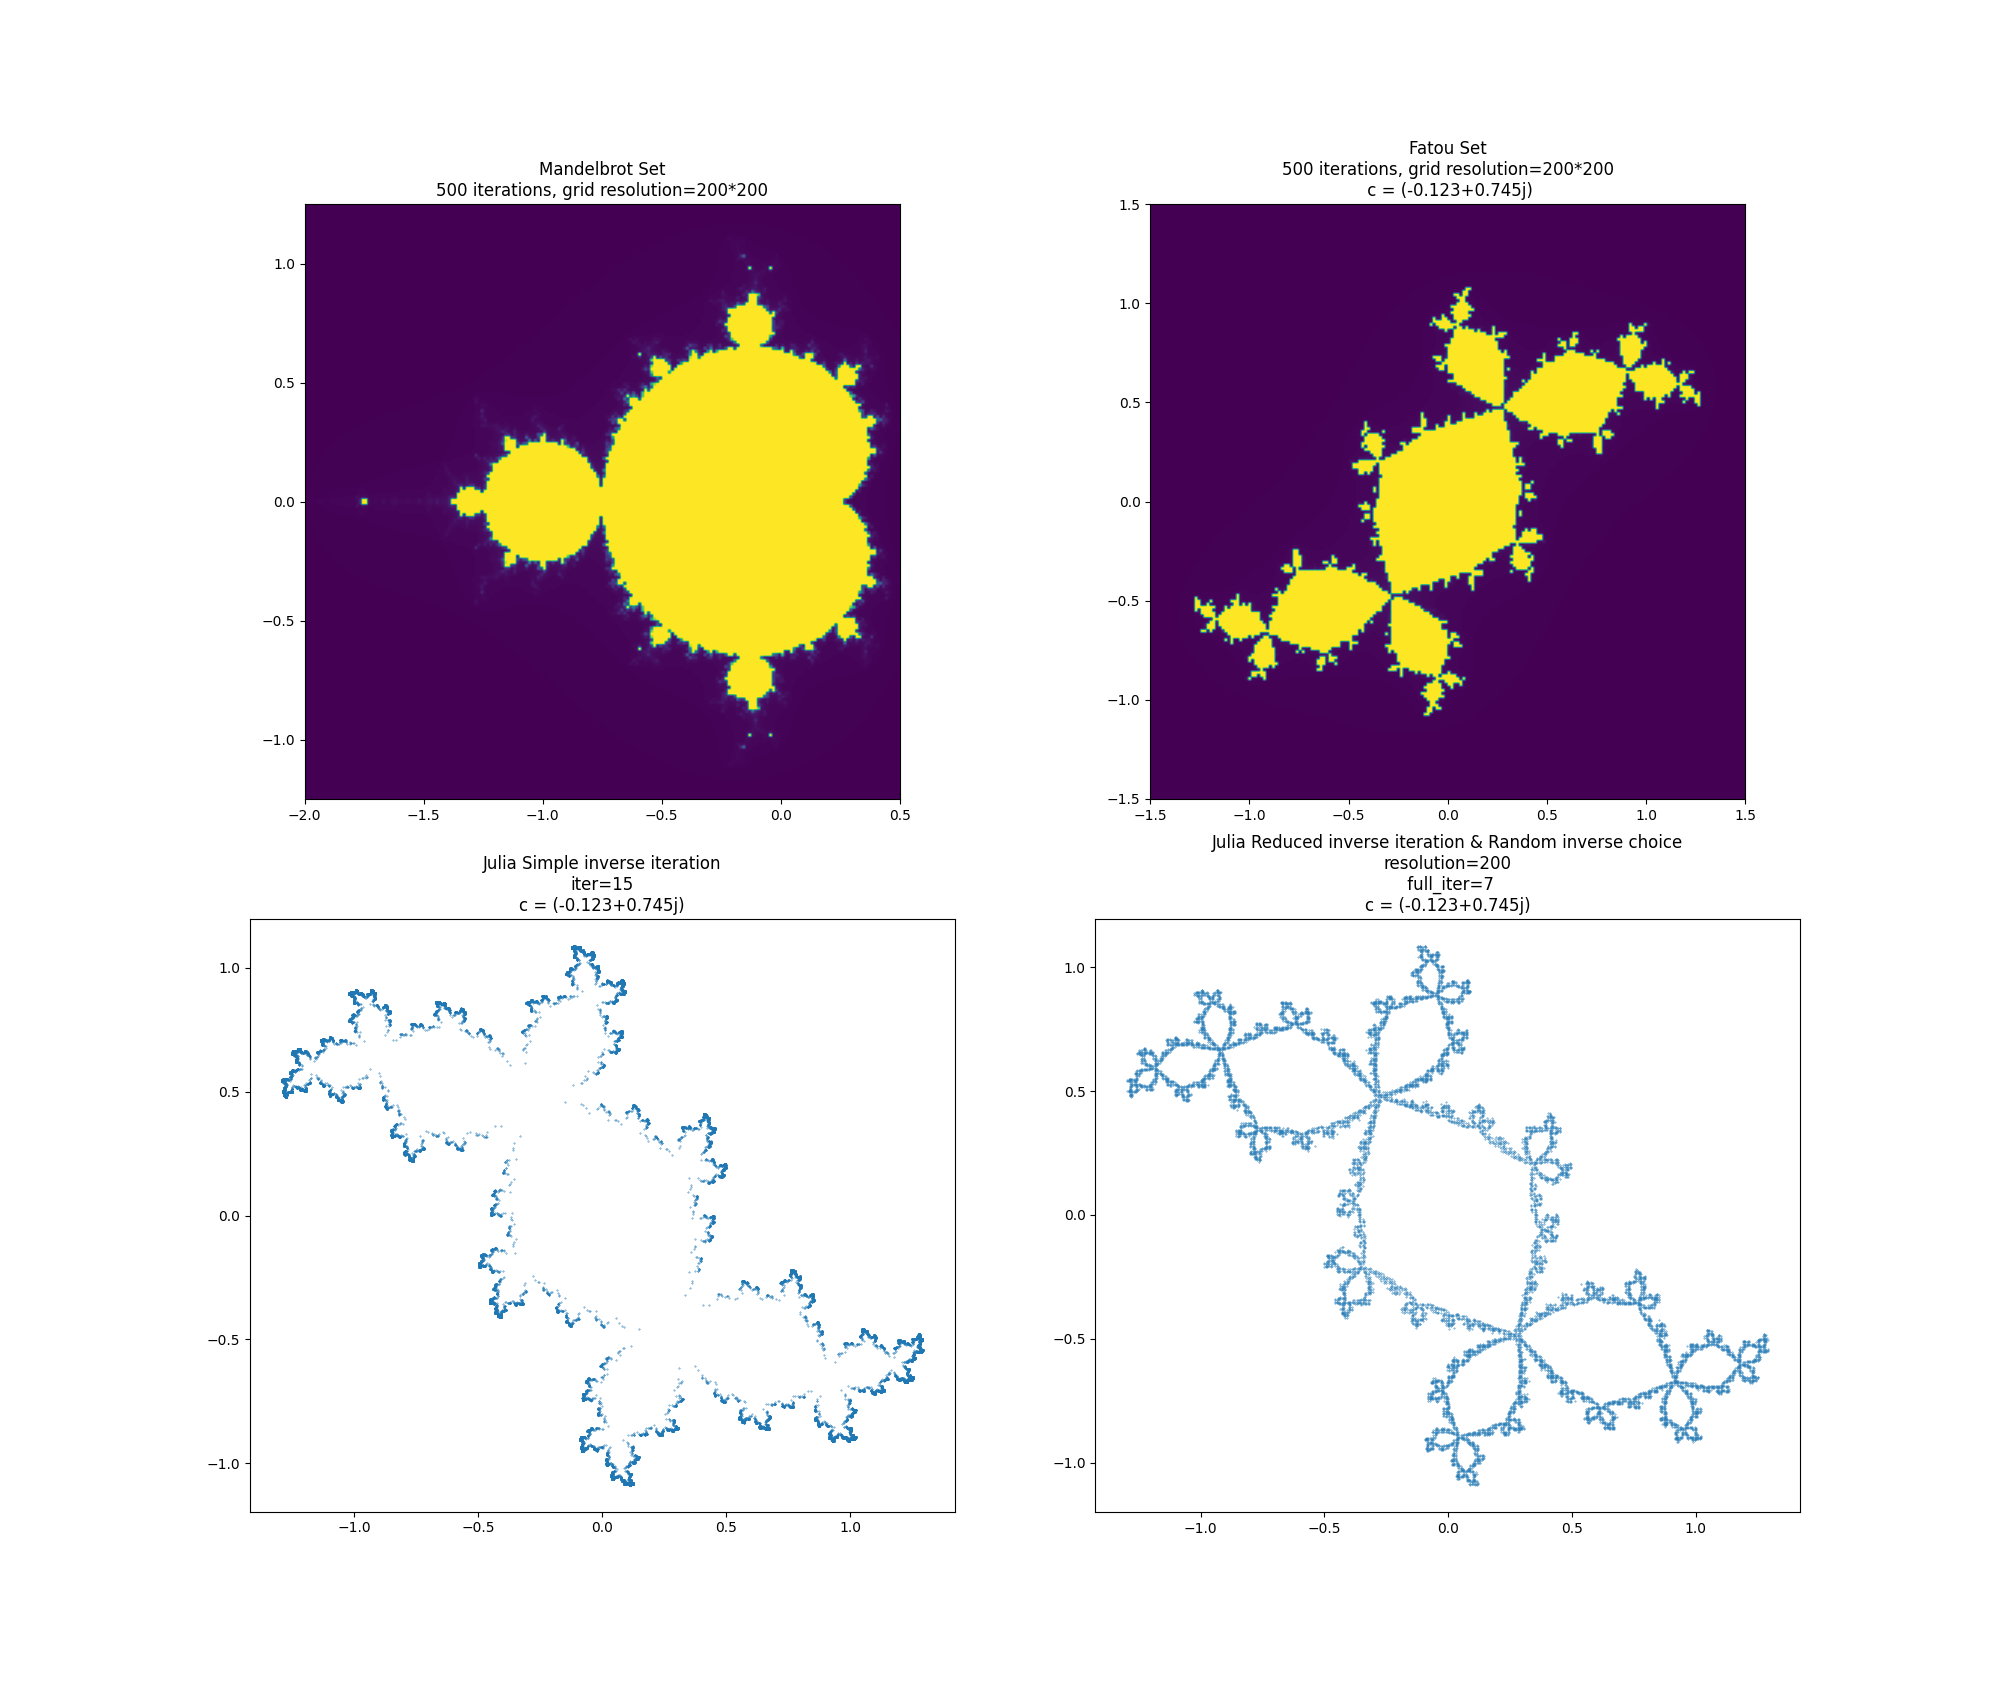

In [113]:
# julia fatuo plots
fig,ax = plt.subplots(2,2)
fig.set_size_inches(20,17)

def draw_mandelbrot_set(ax):
    resolution = 200
    max_iter = 500
    x = np.linspace(-2, 0.5, resolution)
    y = np.linspace(-1.25, 1.25, resolution)
    X, Y = np.meshgrid(x, y)
    ax.imshow(mandelbrot_set(X=X,Y=Y,max_iter=max_iter),extent=(-2, 0.5, -1.25, 1.25))
    ax.set_aspect('equal')
    ax.set_title(f'Mandelbrot Set\n{max_iter} iterations, grid resolution={resolution}*{resolution}')

def draw_quadratic_fatou_set(ax):
    resolution = 200
    max_iter = 500
    c = -0.123 + 0.745j
    x = np.linspace(-1.5, 1.5, resolution)
    y = np.linspace(-1.5, 1.5, resolution)
    X, Y = np.meshgrid(x, y)
    ax.imshow(mandelbrot_set(X=X,Y=Y,max_iter=max_iter, c=c),extent=(-1.5, 1.5, -1.5, 1.5))
    ax.set_aspect('equal')
    ax.set_title(f'Fatou Set\n{max_iter} iterations, grid resolution={resolution}*{resolution}\n c = {c}')

def draw_julia_simple(ax):
    starting_value = 1
    c = -0.123 + 0.745j
    iter = 15
    Z_n = julia_simple(starting_value = starting_value, c = c, iter=iter)
    ax.scatter(Z_n.real, Z_n.imag,s = 0.1)
    ax.set_aspect('equal')
    ax.set_title(f'Julia Simple inverse iteration\niter={iter}\nc = {c}')

def draw_julia_reduced_random(ax):
    starting_value = 1
    c = -0.123 + 0.745j
    iter = 7
    res = 200
    XY = julia_quadratic_map(c=c,starting_value=starting_value,resolution=res,rand=False, max_reduced_iter=200, full_iter = iter)
    ax.scatter(XY[:,0], XY[:,1],s = 0.1)
    ax.set_aspect('equal')
    ax.set_title(f'Julia Reduced inverse iteration & Random inverse choice\nresolution={res}\n full_iter={iter}\nc = {c}')

draw_mandelbrot_set(ax[0,0])
draw_quadratic_fatou_set(ax[0,1])
draw_julia_simple(ax[1,0])
draw_julia_reduced_random(ax[1,1])

### why do I the optimization "expert" care about any of this??

'newton'

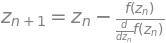

'secant'

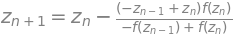

'halley'

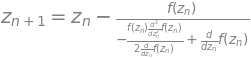

'householder'

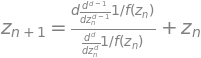

'gradient descent'

In [60]:
sympy.init_printing() 
fz = sympy.Function("f")(z)
for name, rule in iterative_rules.items():
    if rule:
        display(name)
        display(sympy.Eq(next_z,rule(fz)))

This is an actual list of iterative methods used to solve *REAL WORLD* optimization problems. especially gradient descent and its stochastic variants.  
Just like the the previous images depicting the mandelbrot set (a forward iteration) and the julia set (a backward iteration) we can apply these generalized iteration methods over a specific function and plot other fractals.  

There are many more iterative method, some attempt to solve stability issues some attempt to accelerate convergence.  
see more at wiki & [Oscar Veliz](https://www.youtube.com/@OscarVeliz/playlists) <img src="https://yt3.googleusercontent.com/ytc/AIdro_nruBHsG4KaXEXGH1x6KGU6aKSvVG4Mf7q-1SwjCrsTWlI=s176-c-k-c0x00ffffff-no-rj" width="20"/> at youtube  
[Laguerre's Method](https://www.youtube.com/watch?v=blOARV4lnIM)  
[Bairstow's Method](https://www.youtube.com/watch?v=iUGEk6kngFw3)  
[Steffensen's Method with Aitken's Δ²](https://www.youtube.com/watch?v=BTYTj0r5PZE)  



### [Newton fractal](https://www.wikiwand.com/en/Newton_fractal)
> It is the Julia set of the meromorphic function which is given by Newton's method.   
> In this way the Newton fractal is similar to the Mandelbrot set, and like other fractals it exhibits an intricate appearance arising from a simple description.  
> **It is relevant to numerical analysis** because it shows that (outside the region of quadratic convergence) the **Newton method can be very sensitive to its choice of start point.**  

wikipedia

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Julia_set_for_the_rational_function.png/640px-Julia_set_for_the_rational_function.png" width="500"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Timelapse4.jpg" width="500"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Newton_z6_z3.jmb.jpg" width="500"/>
</div>

Left: Fatou sets (blue, red and green) and Julia set (their boundary) for the rational function associated to Newton's method for `f(z) = z**3-1`  
Middle: Newton fractal for `p(z) = sin z`, coloured by root reached, shaded by number of iterations required  
Right: `p(z) = z6 + z3 - 1`

> images by wikipedia

### LET'S TRY TO PLOT SOMETHING
There are many optimization and root finding algorithms provided by [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) the `secant`, `newton` and `halley` methods support root finding over the complex plane so they'll be used for demonstration.


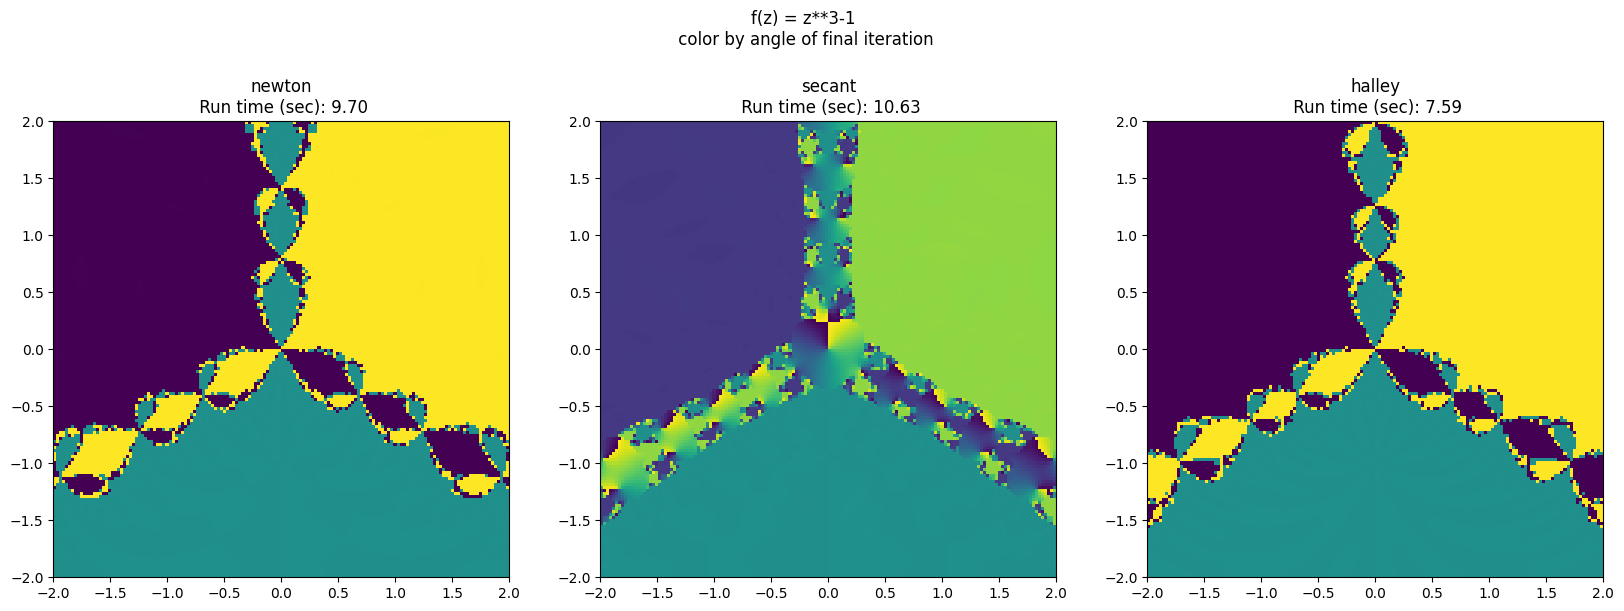

In [ ]:
from scipy import optimize
import time
methods = [
'newton',
'secant',
'halley',
]

# Notes: How x1 is chosen for secant method?
# https://github.com/scipy/scipy/blob/44e4ebaac992fde33f04638b99629d23973cb9b2/scipy/optimize/_zeros_py.py#L353# 
# eps = 1e-4
# p1 = x0 * (1 + eps)
# p1 += (eps if p1 >= 0 else -eps)

def f(X):
    return X**3-1
def fprime(X):
    return 3*X**2
def fprime2(X):
    return 6*X

res = 150
maxiter = 10
eps = 1e-1
options = dict(
    maxiter = maxiter,
    xtol = eps
)
y = x = np.linspace(-2,2,res)
X, Y = np.meshgrid(x,y,indexing='ij')
C = X+1j*Y # XY = np.stack((X, Y), axis=-1)
fig, ax = plt.subplots(1,len(methods),figsize=(20,7))
fig.suptitle('f(z) = z**3-1\n color by angle of final iteration')
for i, method in enumerate(methods):
    opt_root = lambda x0: optimize.root_scalar(f=f, x0=x0,fprime=fprime,fprime2=fprime2, xtol = eps, method=method).root
    opt_root_vectorized =  np.vectorize(opt_root)
    start = time.time()
    roots = opt_root_vectorized(C)
    end = time.time()
    ax[i].imshow(np.angle(roots.view(np.complex128)),extent=(-2,2,-2,2))
    ax[i].set_title(f"{method}\n Run time (sec): {end-start:.2f}")

Although, the scipy implementation with this naive vectorize call doesn't really do well and it takes a huge amount of time to compute anything reasonable and the resolution isn't high compared to the previous images or anything that's available online  
We can still see the general pattern and the fatou and julia sets quite clearly! even with such a "bad" resolution the julia set has a tremendous effect on the final image


### Fractal Explorer 7000 - Side by size pictures

In [17]:
# show the viewer
MultiAlgorithmViewer(Algorithm_presets).show()


C:\Users\devic\AppData\Local\Temp\ipykernel_52152\49035285.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y = fixed_point_loop(
C:\Users\devic\AppData\Local\Temp\ipykernel_52152\49035285.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y = fixed_point_loop(
C:\Users\devic\AppData\Local\Temp\ipykernel_52152\49035285.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y = fixed_point_loop(
C:\Users\devic\AppData\Local\Temp\ipykernel_52152\49035285.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  data, X, Y, C, stability_value, prev_X, prev_Y, next_X, next_Y = fixed_point_loop(


# The importance of Banach fixed-point theorem

> It can be used to give sufficient conditions under which Newton's method of successive approximations is guaranteed to work, and similarly for Chebyshev's third-order method.




theoretical ranges, finding ranges computationally
- learning rates/momentum factors, grid search, gaussian process, cross validation
# More optimizers

"Stability and Magic numbers"


# Modern solutions require modern problems! Optimization Solutions and Bias


## Perceptron Problem
"multiple solution"  
hard/soft SVM  
Loss - Cross Entropy, Relu  

-spider diagram for higher dimension

## issues with generalization:  
Regularization / Penalty function  
Type of bias 1  
Type of bias 2  
Type of bias 3  
Type of bias 4

Gradient flows
definition, examples, ODE

# Creating a biased fixed point iterate
those slides

Read more about Computer assisted calculus!  
Bias  
Bias vs overfitting in the modernity? is it that bad?
Backpropegation vs black box  
"AI" models for dynamical systems  
Numerical errors in computation: The linear computer
Propabalistic algorithms - wiki